In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from string import ascii_letters
import numpy as np
import seaborn as sns

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("/Users/shubh/Desktop/AofAI/Week2/telco.csv")

In [3]:
data = data.iloc[:,1:]
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [6]:
list(data.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
data.iloc[:4,10:]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Feature Engineering

In [6]:
print('Before: ',data['gender'].unique())
data['gender']=data['gender'].replace('Female',1)
data['gender']=data['gender'].replace('Male',0)
print('After: ',data['gender'].unique())

Before:  ['Female' 'Male']
After:  [1 0]


In [7]:
print('Before: ',data['SeniorCitizen'].unique())
data['SeniorCitizen']=data['SeniorCitizen'].replace('Yes',1)
data['SeniorCitizen']=data['SeniorCitizen'].replace('No',0)
print('After: ',data['SeniorCitizen'].unique())

Before:  ['No' 'Yes']
After:  [0 1]


In [8]:
print('Before: ',data['Partner'].unique())
data['Partner']=data['Partner'].replace('Yes',1)
data['Partner']=data['Partner'].replace('No',0)
print('After: ',data['Partner'].unique())

Before:  ['Yes' 'No']
After:  [1 0]


In [9]:
print('Before: ',data['Dependents'].unique())
data['Dependents']=data['Dependents'].replace('Yes',1)
data['Dependents']=data['Dependents'].replace('No',0)
print('After: ',data['Dependents'].unique())

Before:  ['No' 'Yes']
After:  [0 1]


In [10]:
print('Before: ',data['PhoneService'].unique())
data['PhoneService']=data['PhoneService'].replace('Yes',1)
data['PhoneService']=data['PhoneService'].replace('No',0)
print('After: ',data['PhoneService'].unique())

Before:  ['No' 'Yes']
After:  [0 1]


In [11]:
print('Before: ',data['MultipleLines'].unique())
data['MultipleLines']=data['MultipleLines'].replace('Yes',2)
data['MultipleLines']=data['MultipleLines'].replace('No',1)
data['MultipleLines']=data['MultipleLines'].replace('No phone service',0)
print('After: ',data['MultipleLines'].unique())

Before:  ['No phone service' 'No' 'Yes']
After:  [0 1 2]


In [12]:
print('Before: ',data['InternetService'].unique())
data['InternetService']=data['InternetService'].replace('Fiber optic',2)
data['InternetService']=data['InternetService'].replace('DSL',1)
data['InternetService']=data['InternetService'].replace('dsl',1)
data['InternetService']=data['InternetService'].replace('No',0)
print('After: ',data['InternetService'].unique())

Before:  ['DSL' 'Fiber optic' 'No' 'dsl']
After:  [1 2 0]


In [13]:
print('Before: ',data['OnlineSecurity'].unique())
data['OnlineSecurity']=data['OnlineSecurity'].replace('Yes',2)
data['OnlineSecurity']=data['OnlineSecurity'].replace('No',1)
data['OnlineSecurity']=data['OnlineSecurity'].replace('No internet service',0)
print('After: ',data['OnlineSecurity'].unique())

Before:  ['No' 'Yes' 'No internet service']
After:  [1 2 0]


In [14]:
print('Before: ',data['OnlineBackup'].unique())
data['OnlineBackup']=data['OnlineBackup'].replace('Yes',2)
data['OnlineBackup']=data['OnlineBackup'].replace('No',1)
data['OnlineBackup']=data['OnlineBackup'].replace('No internet service',0)
print('After: ',data['OnlineBackup'].unique())

Before:  ['Yes' 'No' 'No internet service']
After:  [2 1 0]


In [15]:
print('Before: ',data['DeviceProtection'].unique())
data['DeviceProtection']=data['DeviceProtection'].replace('Yes',2)
data['DeviceProtection']=data['DeviceProtection'].replace('No',1)
data['DeviceProtection']=data['DeviceProtection'].replace('No internet service',0)
print('After: ',data['DeviceProtection'].unique())

Before:  ['No' 'Yes' 'No internet service']
After:  [1 2 0]


In [16]:
print('Before: ',data['TechSupport'].unique())
data['TechSupport']=data['TechSupport'].replace('Yes',2)
data['TechSupport']=data['TechSupport'].replace('No',1)
data['TechSupport']=data['TechSupport'].replace('No internet service',0)
print('After: ',data['TechSupport'].unique())

Before:  ['No' 'Yes' 'No internet service']
After:  [1 2 0]


In [17]:
print('Before: ',data['StreamingTV'].unique())
data['StreamingTV']=data['StreamingTV'].replace('Yes',2)
data['StreamingTV']=data['StreamingTV'].replace('No',1)
data['StreamingTV']=data['StreamingTV'].replace('No internet service',0)
print('After: ',data['StreamingTV'].unique())

Before:  ['No' 'Yes' 'No internet service']
After:  [1 2 0]


In [18]:
print('Before: ',data['StreamingMovies'].unique())
data['StreamingMovies']=data['StreamingMovies'].replace('Yes',2)
data['StreamingMovies']=data['StreamingMovies'].replace('No',1)
data['StreamingMovies']=data['StreamingMovies'].replace('No internet service',0)
print('After: ',data['StreamingMovies'].unique())

Before:  ['No' 'Yes' 'No internet service']
After:  [1 2 0]


In [19]:
print('Before: ',data['Contract'].unique())
data['Contract']=data['Contract'].replace('Two year',2)
data['Contract']=data['Contract'].replace('One year',1)
data['Contract']=data['Contract'].replace('Month-to-month',0)
print('After: ',data['Contract'].unique())

Before:  ['Month-to-month' 'One year' 'Two year']
After:  [0 1 2]


In [20]:
print('Before: ',data['PaperlessBilling'].unique())
data['PaperlessBilling']=data['PaperlessBilling'].replace('Yes',1)
data['PaperlessBilling']=data['PaperlessBilling'].replace('No',0)
print('After: ',data['PaperlessBilling'].unique())

Before:  ['Yes' 'No']
After:  [1 0]


In [21]:
print('Before: ',data['PaymentMethod'].unique())
data['PaymentMethod']=data['PaymentMethod'].replace('Credit card (automatic)',3)
data['PaymentMethod']=data['PaymentMethod'].replace('Bank transfer (automatic)',2)
data['PaymentMethod']=data['PaymentMethod'].replace('Electronic check',1)
data['PaymentMethod']=data['PaymentMethod'].replace('Mailed check',0)
print('After: ',data['PaymentMethod'].unique())

Before:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
After:  [1 0 2 3]


In [22]:
print('Before: ',data['Churn'].unique())
data['Churn']=data['Churn'].replace('Stayed',1)
data['Churn']=data['Churn'].replace('Churned',0)
print('After: ',data['Churn'].unique())

Before:  ['Stayed' 'Churned']
After:  [1 0]


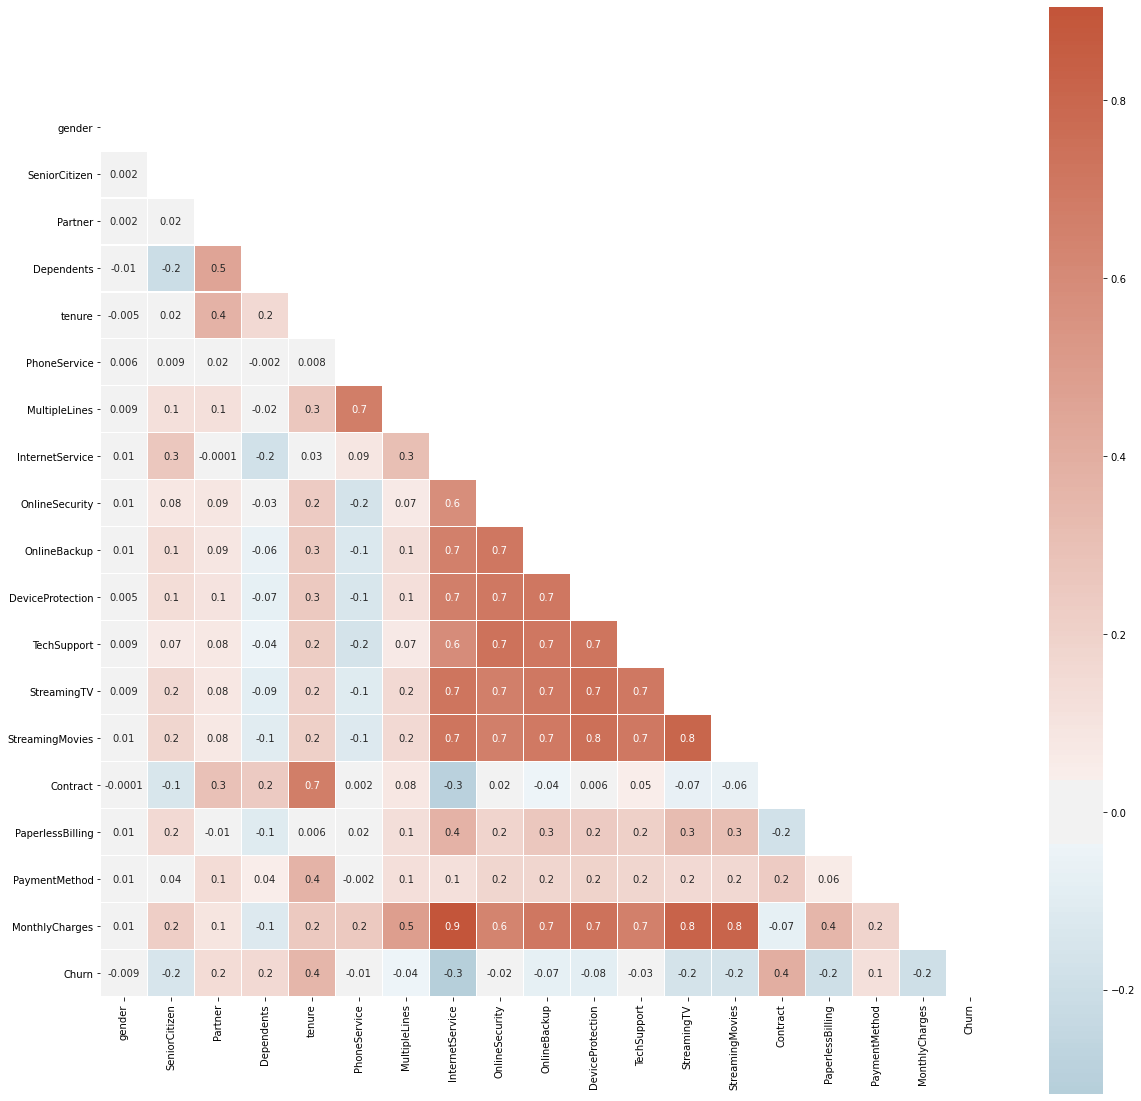

In [23]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, fmt='.1g', mask=mask, cmap=cmap, center=0, square=True, linewidths=.5)

Text(0, 0.5, 'Frequency of Gender')

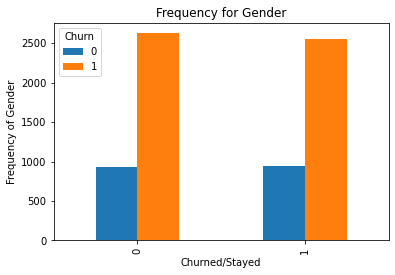

In [24]:
pd.crosstab(data.gender,data.Churn).plot(kind='bar')
plt.title('Frequency for Gender')
plt.xlabel('Churned/Stayed')
plt.ylabel('Frequency of Gender')

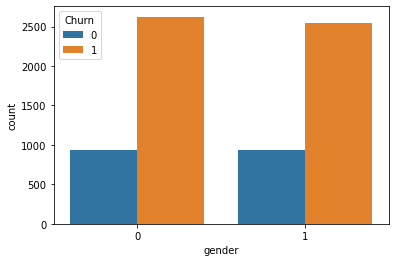

In [25]:
sns.countplot(x='gender',hue='Churn',data=data)

In [26]:
data.drop('gender', axis='columns', inplace=True)

In [27]:
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,1
1,5575-GNVDE,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,0,56.95,1889.5,1
2,3668-QPYBK,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,0,53.85,108.15,0
3,7795-CFOCW,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,1
4,9237-HQITU,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,0


In [28]:
# pd.crosstab(data.PhoneService,data.Churn).plot(kind='bar')
# plt.title('Purchase Frequency for Job Title')
# plt.xlabel('Churned/Stayed')
# plt.ylabel('Phone Service')
# # plt.savefig('purchase_fre_job')

In [29]:
data.drop('customerID', axis='columns', inplace=True)

In [30]:
data.drop('PhoneService', axis='columns', inplace=True)

In [31]:
data['TotalCharges']=data['TotalCharges'].replace(' ',0)

In [32]:
pd.to_numeric(data['TotalCharges'])
data['TotalCharges']=data['TotalCharges'].astype('float')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


In [34]:
data.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

##  Logistic Regression Model

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1), 
                                                    data['Churn'], test_size=0.30, 
                                                    random_state=150)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg', max_iter=210)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       527
           1       0.87      0.88      0.87      1586

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



# XGBOOST MODEL

In [38]:
# fit model no training data
model2 = XGBClassifier(learning_rate =0.1,booster='gbtree',max_depth=40,min_child_weight=2,n_estimators=2000,
                       random_state=310,gamma=3,reg_alpha=5
                     ,reg_lambda=20 )
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=40,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
              random_state=310, reg_alpha=5, reg_lambda=20, scale_pos_weight=1,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [39]:
# make predictions for test data
y_pred = model.predict(X_test)

In [40]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.93%
